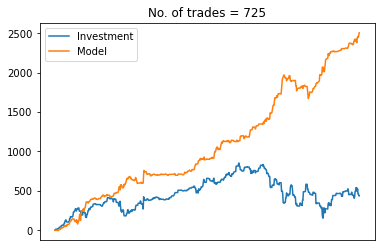

437.4499999999998 2505.420000000002
36.848445028471296 % Investment growth in 13 months
211.04316183159824 % Model growth in 13 months
373.45909497279104 % Model compound growth in 13 months
16.2340893716614 % per month


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pred_name = "Para_News240_Combined_240_Predictions_XGBoost_TFIDF"

news_time = 240
stock = 'Amazon'
interval = 240

#charts_path = "../DataSets/Stock Prices/" + str(stock) + '_data_' + str(interval) + 'm.csv'
#chart_data = pd.read_csv(charts_path, header=0)
#chart_data['DateTime'] = pd.to_datetime(chart_data['Datetime'], utc=True)

charts_path = '../DataSets/CHARTS/CHARTS/'
charts_path += str.upper(stock) + str(interval) + '.csv'
chart_data = pd.read_csv(charts_path, names = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
chart_data['DateTime'] = chart_data.Date + "T" + chart_data.Time
chart_data['DateTime'] = pd.to_datetime(chart_data['DateTime'], format='%Y.%m.%d %H:%M',utc=True)
chart_data['Movement'] = np.where(chart_data['Open'] < chart_data['Close'],1,-1)

val_nat_list = [0]
val_list = [0]
val_nat = 0
val = 0
com = 1

pred_path = "../DataSets/Predictions/" + str(pred_name) + ".csv"
pred = pd.read_csv(pred_path, header = 0)
pred['DateTime'] = pd.to_datetime(pred['DateTime'], utc=True)
pred = pred.sort_values(by='DateTime').reset_index()
count = 0
for pred_index, p in pred.iterrows():
    for chart_index, chart in chart_data.iterrows():
        react_time = (chart.DateTime - p.DateTime).total_seconds()
        if react_time >= news_time*60 and react_time < (interval+news_time)*60:
            if count == 0:
                Invest_price = chart.Open
                Invest_time = chart.DateTime
            #if abs(chart.Close - chart.Open) > 95:
            #val += p.ActualMovement * (chart.Close - chart.Open)
            if p.PredictedMovement != 0 and p.Stock == stock:
                val += p.PredictedMovement * (chart.Close - chart.Open)
                com *= (chart.Close/chart.Open) ** p.PredictedMovement
                val_nat = chart.Close - Invest_price
                val_nat_list.append(val_nat)
                val_list.append(val)
                count += 1
                Selling_price = chart.Close
                Selling_time = chart.DateTime
        elif react_time < 0:
            chart_data.drop(chart_index, inplace = True)
        if react_time > (interval+news_time)*60:
            break

plt.plot(range(count+1), val_nat_list, label = 'Investment')
plt.plot(range(count+1), val_list, label = 'Model')
plt.title("No. of trades = " + str(count+1))
plt.legend()
plt.xticks([])
plt.show()

time = (Selling_time.year - Invest_time.year) * 12 + (Selling_time.month - Invest_time.month)
val_nat = Selling_price - Invest_price
print(val_nat,val)
print((val_nat*100)/Invest_price,"% Investment growth in", time, "months")
print((val*100)/Invest_price,"% Model growth in", time, "months")
print((com-1)*100,"% Model compound growth in", time, "months")
print((val*100)/(Invest_price*time),"% per month")

In [154]:
a = (np.sum(np.where(pred.PredictedMovement == pred.ActualMovement,1,0)))
b = (pred.shape[0]+1)
print(100*a/b)

60.03103524717358
